In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import kruskal, mannwhitneyu

from itertools import product
 

In [2]:
df = pd.read_csv('data/IST_corrected_clean.csv',  index_col= [0])

In [3]:
def print_stats(stat, p):
    print('stat = %.3f, p = %.3f' % (stat, p))
    if p > 0.05:
	    print('Probably the same distribution')
    else:
	    print('Probably different distributions')

+ aspirin vs non-aspirin
    + aspirin vs non-aspirin subdivided in prior aspirin
    + aspirin vs non-aspirin subdivided in hours between onset and randomisation (3, 6, 12, 24, 48)
+ heparin vs non-heparin
    + non vs low vs medium heparin
    + heparin vs non-heparin subdivided in prior heparin
    + heparin vs non-heparin subdivided in hours between onset and randomisation (3, 6, 12, 24, 48)
+ combination of aspirin and heparin
    + (significantly) different outcome than separate effects of aspirin and heparin

In [4]:
def r_time(x):
        if x <= 3: return '0 - 3'
        elif x <= 6: return '4 - 6'
        elif x <= 12: return '7 - 12'
        elif x <= 24: return '13 - 24'
        elif x <= 48: return '25 - 48'

df['RDELAY_bin'] = pd.Categorical(df.RDELAY.apply(r_time), 
                ['0 - 3', '4 - 6', '7 - 12', '13 - 24', '25 - 48'])

+ DASP14 - Aspirin given (Y/N)
+ HEP14 - Heparin given (L, M, None)
+ RXHEP14 - Heparin given (Y/N)

+ RHEP24 - Heparin 24h prior to stroke
+ RASP3 - Aspirin 3 days prior to stroke

In [8]:
print(df.DALIVE.value_counts())
df.RDISCH14.value_counts()

Y    9906
N    8886
Name: DALIVE, dtype: int64


Discharged alive from hospital    9906
Not discharged                    6896
Dead on discharge form            1990
Name: RDISCH14, dtype: int64

### aspirin vs non-aspirin
#### aspirin vs non-aspirin


In [5]:
group_asp = df.groupby(by=['RASP3'])
group_asp['RDISCH14'].value_counts()

RASP3  RDISCH14                      
N      Discharged alive from hospital    7396
       Not discharged                    5129
       Dead on discharge form            1505
Y      Discharged alive from hospital    2037
       Not discharged                    1383
       Dead on discharge form             374
Name: RDISCH14, dtype: int64

In [6]:
df.RASP3.value_counts()

N    14030
Y     3794
Name: RASP3, dtype: int64

In [9]:
group_asp = df.groupby('DASP14')
group_asp_n = []
group_asp_y = []
for name, group in group_asp:
    if name == 'Y':
        group_asp_y.append(group['RDISCH14'])
    if name == 'N':
        group_asp_n.append(group['RDISCH14'])

stat, p = kruskal(group_asp_y[0], group_asp_n[0])
print('Kruskal Wallis')
print_stats(stat, p)

Kruskal Wallis
stat = 3.142, p = 0.076
Probably the same distribution


In [8]:
group_asp = df.groupby('DASP14')

After 14 days: No difference between patients who were given Aspirin in comparison to those who didn't.


In [91]:
group_asp = df.groupby('DASP14')
group_asp_n = []
group_asp_y = []
for name, group in group_asp:
    if name == 'Y':
        group_asp_y.append(group['OCCODE'])
    if name == 'N':
        group_asp_n.append(group['OCCODE'])

stat, p = kruskal(group_asp_y[0], group_asp_n[0])
print('Kruskal Wallis')
print_stats(stat, p)

Kruskal Wallis
stat = 35.669, p = 0.000
Probably different distributions


After 6 months: Difference between patients who received Aspirin and those who did not.

In [93]:
group_asp['OCCODE'].value_counts()

DASP14  OCCODE       
N       Dependent        4135
        Dead             2320
        Not recovered    1927
        Recovered        1581
Y       Dependent        3605
        Not recovered    1817
        Dead             1801
        Recovered        1600
Name: OCCODE, dtype: int64

<ipython-input-104-b8684f48b9c8>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


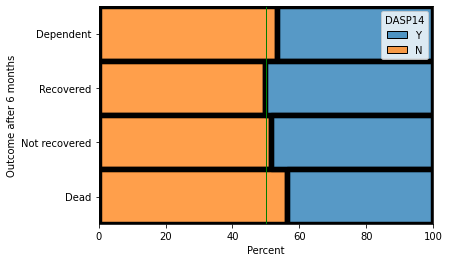

In [104]:
ax = sns.histplot(y = df.OCCODE,
                 hue= df.DASP14,
                 stat = 'probability',
                 multiple="fill",
                 #order = ['Control', 'Aspirin', 'Low Heparin', 'Medium Heparin', 'Aspirin + Low Heparin', 'Aspirin + Medium Heparin']
                 #palette = COLOR_STYPE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Outcome after 6 months")

plt.axvspan(0.499, 0.501, color = 'green')

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
#           labels = ['Indeterminate stroke', 'Haemorrhagic stroke', 'Ischaemic stroke'], labelspacing=1.2)

#plt.savefig("images/treat_perc_diagstr.png", bbox_inches="tight")
plt.show()

#### aspirin vs non-aspirin subdivided in prior aspirin

In [10]:
group_asp_asp = df.groupby(by = ['DASP14','RASP3'])

In [11]:
group_asp_asp.groups.keys()

dict_keys([('N', 'N'), ('N', 'Y'), ('N', nan), ('Y', 'N'), ('Y', 'Y'), ('Y', nan), (nan, 'N')])

In [12]:
group_asp_yy = []
group_asp_yn = []
group_asp_nn = []
group_asp_ny = []

asp_yy = group_asp_asp.get_group(('Y', 'Y'))    # Aspirin prior to stroke and aspirin during study
group_asp_yy.append(asp_yy['RDISCH14'])

asp_yn = group_asp_asp.get_group(('Y', 'N'))    # Aspirin prior to stroke and no aspirin during study
group_asp_yn.append(asp_yn['RDISCH14'])

asp_ny = group_asp_asp.get_group(('N', 'Y'))    # No Aspirin prior to stroke and aspirin during study
group_asp_ny.append(asp_ny['RDISCH14'])

asp_nn = group_asp_asp.get_group(('N', 'N'))    # No Aspirin prior to stroke and no aspirin during study
group_asp_nn.append(asp_nn['RDISCH14'])

stat, p = kruskal(group_asp_yy[0], group_asp_yn[0],group_asp_ny[0], group_asp_nn[0])
print('Kruskal Wallis')
print_stats(stat, p)

Kruskal Wallis
stat = 3.565, p = 0.312
Probably the same distribution


In [ ]:
# different approach - this way i get mann-whitney-test-loop running (if needed - not in this case)

In [95]:
group_asp_y = df[df['DASP14']=='Y'] # patients were given aspirin for at least 14 days
group_asp_n = df[df['DASP14']=='N'] # patients did not receive aspirin

In [17]:
group_asp_yy = group_asp_y[group_asp_y['RASP3']=='Y'] # patients received aspirin and self-medicated with aspirin prior to their stroke
group_asp_yn = group_asp_y[group_asp_y['RASP3']=='N'] # patients received aspirin and did not take aspirin prior to their stroke
group_asp_nn = group_asp_n[group_asp_n['RASP3']=='N'] # patients did not receive aspirin and selfmedicated with aspirin prior to their stroke
group_asp_ny = group_asp_n[group_asp_n['RASP3']=='Y'] # patients did not receive aspirin and did not take aspirin prior to their stroke

In [18]:
data1 = group_asp_yy['RDISCH14'].tolist()
data2 = group_asp_yn['RDISCH14'].tolist()
data3 = group_asp_nn['RDISCH14'].tolist()
data4 = group_asp_ny['RDISCH14'].tolist()
stat, p = kruskal(data1, data2, data3, data4)

In [19]:
print_stats(stat, p)

stat = 3.565, p = 0.312
Probably the same distribution


After 14 days: No difference between patients that were given Aspirin and additionally took Aspirin prior to their stroke, compared to patients the other groups.

In [ ]:
data0 = group_asp_yy['OCCODE'].tolist()
data1 = group_asp_yn['OCCODE'].tolist()
data2 = group_asp_nn['OCCODE'].tolist()
data3 = group_asp_ny['OCCODE'].tolist()
stat, p = kruskal(data0, data1, data2, data3)

In [89]:
print_stats(stat, p)

stat = 1998000.500, p = 0.500
Probably the same distribution


After 6 months: no difference between patients that were given Aspirin and additionally took Aspirin prior to their stroke, compared to patients the other groups.

#### aspirin vs non-aspirin subdivided in hours between onset and randomisation (3, 6, 12, 24, 48)

In [20]:
group_asp_delay = df.groupby(by = ['DASP14','RDELAY_bin'])
group_asp_delay.groups.keys()

dict_keys([('N', '0 - 3'), ('N', '13 - 24'), ('N', '25 - 48'), ('N', '4 - 6'), ('N', '7 - 12'), ('Y', '0 - 3'), ('Y', '13 - 24'), ('Y', '25 - 48'), ('Y', '4 - 6'), ('Y', '7 - 12'), (nan, '13 - 24'), (nan, '25 - 48'), (nan, '7 - 12')])

In [21]:
group_asp_y3 = []
group_asp_y6 = []
group_asp_y12 = []
group_asp_y24 = []
group_asp_y48 = []

group_asp_n3 = []
group_asp_n6 = []
group_asp_n12 = []
group_asp_n24 = []
group_asp_n48 = []

In [105]:
asp_y3 = group_asp_delay.get_group(('Y', '0 - 3'))    # Aspirin prior to stroke and aspirin during study
group_asp_y3.append(asp_y3['RDISCH14'])
asp_y6 = group_asp_delay.get_group(('Y', '4 - 6'))    # Aspirin prior to stroke and aspirin during study
group_asp_y6.append(asp_y6['RDISCH14'])
asp_y12 = group_asp_delay.get_group(('Y', '7 - 12'))    # Aspirin prior to stroke and aspirin during study
group_asp_y12.append(asp_y12['RDISCH14'])
asp_y24 = group_asp_delay.get_group(('Y', '13 - 24'))    # Aspirin prior to stroke and aspirin during study
group_asp_y24.append(asp_y24['RDISCH14'])
asp_y48 = group_asp_delay.get_group(('Y', '25 - 48'))    # Aspirin prior to stroke and aspirin during study
group_asp_y48.append(asp_y48['RDISCH14'])

#

asp_n3 = group_asp_delay.get_group(('N', '0 - 3'))    # Aspirin prior to stroke and aspirin during study
group_asp_n3.append(asp_n3['RDISCH14'])
asp_n6 = group_asp_delay.get_group(('N', '4 - 6'))    # Aspirin prior to stroke and aspirin during study
group_asp_n6.append(asp_n6['RDISCH14'])
asp_n12 = group_asp_delay.get_group(('N', '7 - 12'))    # Aspirin prior to stroke and aspirin during study
group_asp_n12.append(asp_n12['RDISCH14'])
asp_n24 = group_asp_delay.get_group(('N', '13 - 24'))    # Aspirin prior to stroke and aspirin during study
group_asp_n24.append(asp_n24['RDISCH14'])
asp_n48 = group_asp_delay.get_group(('N', '25 - 48'))    # Aspirin prior to stroke and aspirin during study
group_asp_n48.append(asp_n48['RDISCH14'])

,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,...,19396,19401,19405,19408,19409,19417,19423,19430,19431,19433
5,1.0,39.0,F,M,54.0,N,NaN,Y,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,1.0,29.0,F,M,63.0,N,NaN,Y,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,4.0,35.0,F,M,47.0,Y,NaN,N,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,1.0,26.0,D,M,64.0,N,NaN,Y,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,3.0,47.0,F,F,79.0,N,NaN,Y,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19423,113.0,33.0,F,F,76.0,Y,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19430,255.0,42.0,F,M,66.0,N,N,Y,Y,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19431,255.0,47.0,F,M,75.0,N,N,Y,Y,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19433,255.0,40.0,D,F,87.0,N,N,Y,Y,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
stat, p = kruskal(group_asp_y3[0], group_asp_y6[0],group_asp_y12[0], group_asp_y24[0], group_asp_y48[0],
                group_asp_n3[0], group_asp_n6[0],group_asp_n12[0], group_asp_n24[0], group_asp_n48[0])
print('Kruskal Wallis')
print_stats(stat, p)

Kruskal Wallis
stat = 27.864, p = 0.001
Probably different distributions


In [24]:
datax = [group_asp_y3, group_asp_y6,group_asp_y12, group_asp_y24, group_asp_y48,
                group_asp_n3, group_asp_n6,group_asp_n12, group_asp_n24, group_asp_n48]
datay = [group_asp_y3, group_asp_y6,group_asp_y12, group_asp_y24, group_asp_y48,
                group_asp_n3, group_asp_n6,group_asp_n12, group_asp_n24, group_asp_n48]

In [28]:
for datax, datay in product(datax, datay):
    print()
    stat, p = mannwhitneyu(datax, datay)
    print_stats(stat, p)


stat = 64082.000, p = 0.500
Probably the same distribution


In [95]:
#asp_delay1, asp_delay2, asp_delay3, asp_delay4, asp_delay5, asp_delay6, asp_delay7, asp_delay8, asp_delay9, asp_delay10 = ([] for i in range(10))

In [ ]:
#for i in keys:
#    asp_delay = group_asp_delay.get_group([i])    # Aspirin prior to stroke and aspirin during study
#    asp_delay1.append(asp_delay['RDISCH14'])

In [106]:
group_asp_y3 = group_asp_y[group_asp_y['RDELAY_bin']=='0 - 3'] # patients received aspirin within 3 hours after their stroke
group_asp_y6 = group_asp_y[group_asp_y['RDELAY_bin']=='4 - 6'] # patients received aspirin within 6 hours after their stroke
group_asp_y12 = group_asp_y[group_asp_y['RDELAY_bin']=='7 - 12'] # patients received aspirin within 12 hours after their stroke
group_asp_y24 = group_asp_y[group_asp_y['RDELAY_bin']=='13 - 24'] # patients received aspirin within 24 hours after their stroke
group_asp_y48 = group_asp_y[group_asp_y['RDELAY_bin']=='25 - 48'] # patients received aspirin within 48 hours after their stroke

group_asp_n3 = group_asp_n[group_asp_n['RDELAY_bin']=='0 - 3'] # patients did not receive aspirin and joined the study within 3 hours after their stroke
group_asp_n6 = group_asp_n[group_asp_n['RDELAY_bin']=='4 - 6'] # patients did not receive aspirin and joined the study within 6 hours after their stroke
group_asp_n12 = group_asp_n[group_asp_n['RDELAY_bin']=='7 - 12'] # patients did not receive aspirin and joined the study within 12 hours after their stroke
group_asp_n24 = group_asp_n[group_asp_n['RDELAY_bin']=='13 - 24'] # patients did not receive aspirin and joined the study within 24 hours after their stroke
group_asp_n48 = group_asp_n[group_asp_n['RDELAY_bin']=='25 - 48'] # patients did not receive aspirin and joined the study within 48 hours after their stroke

In [68]:
data0 = group_asp_y3['RDISCH14'].tolist()
data1 = group_asp_y6['RDISCH14'].tolist()
data2 = group_asp_y12['RDISCH14'].tolist()
data3 = group_asp_y24['RDISCH14'].tolist()
data4 = group_asp_y48['RDISCH14'].tolist()

data5 = group_asp_n3['RDISCH14'].tolist()
data6 = group_asp_n6['RDISCH14'].tolist()
data7 = group_asp_n12['RDISCH14'].tolist()
data8 = group_asp_n24['RDISCH14'].tolist()
data9 = group_asp_n48['RDISCH14'].tolist()
stat, p = kruskal(data0, data1, data2, data3, data4, data5, data6, data7, data8, data9)

In [69]:
print_stats(stat, p)

stat = 27.864, p = 0.001
Probably different distributions


There are differences between those groups. Let's check which groups differ significantly.

In [70]:
datax = [data0, data1, data2, data3, data4, data5, data6, data7, data8, data9]
datay = [data0, data1, data2, data3, data4, data5, data6, data7, data8, data9]

In [75]:
iterator = product(enumerate(datax), enumerate(datay))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 64082.000, p = 0.500
Probably the same distribution

0 1
stat = 176842.500, p = 0.187
Probably the same distribution

0 2
stat = 318515.000, p = 0.234
Probably the same distribution

0 3
stat = 440764.000, p = 0.059
Probably the same distribution

0 4
stat = 508649.500, p = 0.008
Probably different distributions

0 5
stat = 80694.000, p = 0.449
Probably the same distribution

0 6
stat = 209523.000, p = 0.198
Probably the same distribution

0 7
stat = 358405.500, p = 0.013
Probably different distributions

0 8
stat = 474956.000, p = 0.036
Probably different distributions

0 9
stat = 558869.500, p = 0.006
Probably different distributions

1 0
stat = 176842.500, p = 0.187
Probably the same distribution

1 1
stat = 517144.500, p = 0.500
Probably the same distribution

1 2
stat = 918241.500, p = 0.360
Probably the same distribution

1 3
stat = 1290742.000, p = 0.204
Probably the same distribution

1 4
stat = 1490677.500, p = 0.018
Probably different distributions

1 5
stat = 2252

+ 0 4: p = 0.008
+ 0 7: p = 0.013
+ 0 8: p = 0.036
+ 0 9: p = 0.006
+ 1 4: p = 0.018
+ 1 7: p = 0.027
+ 1 9: p = 0.011
+ 2 4: p = 0.001
+ 2 7: p = 0.003
+ 2 8: p = 0.022
+ 2 9: p = 0.000
+ 3 4: p = 0.041
+ 3 9: p = 0.019
+ 4 5: p = 0.010
+ 4 6: p = 0.014
+ 5 7: p = 0.015
+ 5 8: p = 0.044
+ 5 9: p = 0.008
+ 6 7: p = 0.022
+ 6 9: p = 0.008



In [77]:
# why isn't that working?
iterator = product(enumerate(datax), enumerate(datay))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    stat, p = mannwhitneyu(first_group, second_group)
    if p > 0.5:
        print()
    else:
        print(first_idx, second_idx)
        print_stats(stat, p)
    print()

0 0
stat = 64082.000, p = 0.500
Probably the same distribution

0 1
stat = 176842.500, p = 0.187
Probably the same distribution

0 2
stat = 318515.000, p = 0.234
Probably the same distribution

0 3
stat = 440764.000, p = 0.059
Probably the same distribution

0 4
stat = 508649.500, p = 0.008
Probably different distributions

0 5
stat = 80694.000, p = 0.449
Probably the same distribution

0 6
stat = 209523.000, p = 0.198
Probably the same distribution

0 7
stat = 358405.500, p = 0.013
Probably different distributions

0 8
stat = 474956.000, p = 0.036
Probably different distributions

0 9
stat = 558869.500, p = 0.006
Probably different distributions

1 0
stat = 176842.500, p = 0.187
Probably the same distribution

1 1
stat = 517144.500, p = 0.500
Probably the same distribution

1 2
stat = 918241.500, p = 0.360
Probably the same distribution

1 3
stat = 1290742.000, p = 0.204
Probably the same distribution

1 4
stat = 1490677.500, p = 0.018
Probably different distributions

1 5
stat = 2252

Patients who did receive aspirin in the study, show a difference when comparing joining the study within 3 hours or 48 hours after their stroke. 

There is a difference in putcome when comparing patients who received aspirin and joined the study within 3 hours after their stroke with patients who did not receive aspirin and joined the study within 12, 24 and 48 hours after their stroke.

In [107]:
data0 = group_asp_y3['OCCODE'].tolist()
data1 = group_asp_y6['OCCODE'].tolist()
data2 = group_asp_y12['OCCODE'].tolist()
data3 = group_asp_y24['OCCODE'].tolist()
data4 = group_asp_y48['OCCODE'].tolist()

data5 = group_asp_n3['OCCODE'].tolist()
data6 = group_asp_n6['OCCODE'].tolist()
data7 = group_asp_n12['OCCODE'].tolist()
data8 = group_asp_n24['OCCODE'].tolist()
data9 = group_asp_n48['OCCODE'].tolist()
stat, p = kruskal(data0, data1, data2, data3, data4, data5, data6, data7, data8, data9)

In [108]:
print_stats(stat, p)

stat = 131.437, p = 0.000
Probably different distributions


In [109]:
datax = [data0, data1, data2, data3, data4, data5, data6, data7, data8, data9]
datay = [data0, data1, data2, data3, data4, data5, data6, data7, data8, data9]

In [110]:
iterator = product(enumerate(datax), enumerate(datay))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 64082.000, p = 0.500
Probably the same distribution

0 1
stat = 177388.500, p = 0.225
Probably the same distribution

0 2
stat = 305725.500, p = 0.028
Probably different distributions

0 3
stat = 411241.000, p = 0.000
Probably different distributions

0 4
stat = 477989.500, p = 0.000
Probably different distributions

0 5
stat = 76648.000, p = 0.078
Probably the same distribution

0 6
stat = 209800.000, p = 0.217
Probably the same distribution

0 7
stat = 371407.000, p = 0.149
Probably the same distribution

0 8
stat = 471951.000, p = 0.029
Probably different distributions

0 9
stat = 554646.000, p = 0.005
Probably different distributions

1 0
stat = 177388.500, p = 0.225
Probably the same distribution

1 1
stat = 517144.500, p = 0.500
Probably the same distribution

1 2
stat = 891514.000, p = 0.047
Probably different distributions

1 3
stat = 1202397.500, p = 0.000
Probably different distributions

1 4
stat = 1398419.500, p = 0.000
Probably different distributions

1 5
stat 

+ 0 2: p = 0.028
+ 0 3: p = 0.000
+ 0 4: p = 0.000
+ 0 8: p = 0.029
+ 0 9: p = 0.005
+ 1 2: p = 0.047
+ 1 3: p = 0.000
+ 1 4: p = 0.000
+ 1 5: p = 0.004
+ 1 6: p = 0.012
+ 1 9: p = 0.004
+ 2 3: p = 0.003
+ 2 4: p = 0.000
+ 2 5: p = 0.000
+ 2 6: p = 0.041
+ 3 5: p = 0.000
+ 3 6: p = 0.000
+ 3 7: p = 0.000
+ 3 8: p = 0.000
+ 3 9: p = 0.013
+ 4 5: p = 0.000
+ 4 6: p = 0.000
+ 4 7: p = 0.000
+ 4 8: p = 0.000
+ 4 9: p = 0.000
+ 5 7: p = 0.001
+ 5 8: p = 0.000
+ 5 9: p = 0.000
+ 6 7: p = 0.001
+ 6 8: p = 0.000
+ 6 9: p = 0.000
+ 7 8: p = 0.050
+ 7 9: p = 0.001



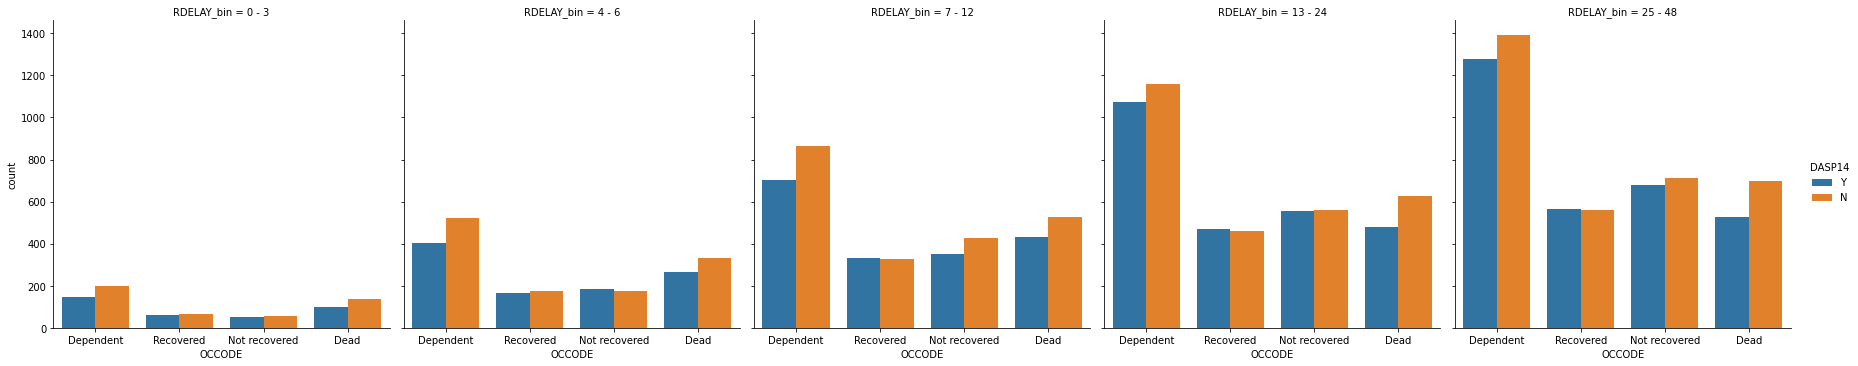

In [129]:
sns.catplot(x="OCCODE", col="RDELAY_bin", hue ='DASP14', data=df,kind="count")

<ipython-input-117-d3d1a9175ea4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


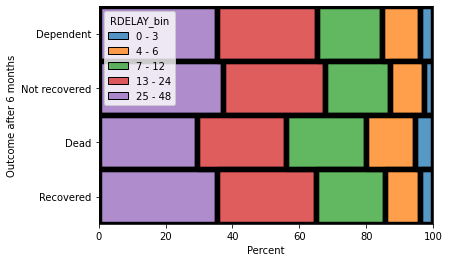

In [117]:
ax = sns.histplot(y = group_asp_y.OCCODE,
                 hue= group_asp_y.RDELAY_bin,
                 stat = 'probability',
                 multiple="fill",
                 #order = ['Control', 'Aspirin', 'Low Heparin', 'Medium Heparin', 'Aspirin + Low Heparin', 'Aspirin + Medium Heparin']
                 #palette = COLOR_STYPE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Outcome after 6 months")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
#           labels = ['Indeterminate stroke', 'Haemorrhagic stroke', 'Ischaemic stroke'], labelspacing=1.2)

#plt.savefig("images/treat_perc_diagstr.png", bbox_inches="tight")
plt.show()

<ipython-input-118-15097053b16f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


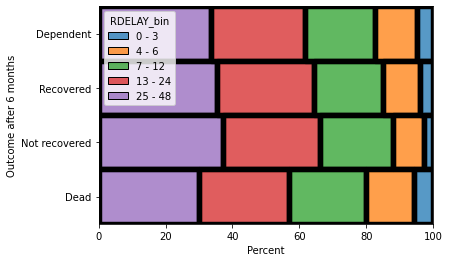

In [118]:
ax = sns.histplot(y = group_asp_n.OCCODE,
                 hue= group_asp_n.RDELAY_bin,
                 stat = 'probability',
                 multiple="fill",
                 #order = ['Control', 'Aspirin', 'Low Heparin', 'Medium Heparin', 'Aspirin + Low Heparin', 'Aspirin + Medium Heparin']
                 #palette = COLOR_STYPE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Outcome after 6 months")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
#           labels = ['Indeterminate stroke', 'Haemorrhagic stroke', 'Ischaemic stroke'], labelspacing=1.2)

#plt.savefig("images/treat_perc_diagstr.png", bbox_inches="tight")
plt.show()

### Heparin vs non-heparin


In [79]:
group_hep_y = df[df['RXHEP14']=='Y'] # patients were given heparin for at least 14 days
group_hep_n = df[df['RXHEP14']=='N'] # patients did not receive aspirin

In [80]:
data1 = group_hep_y['RDISCH14'].tolist()
data2 = group_hep_n['RDISCH14'].tolist()
stat, p = kruskal(data1, data2)
print_stats(stat, p)

stat = 0.198, p = 0.656
Probably the same distribution


After 14 days: No difference between heparin and no heparin.

In [111]:
data1 = group_hep_y['OCCODE'].tolist()
data2 = group_hep_n['OCCODE'].tolist()
stat, p = kruskal(data1, data2)
print_stats(stat, p)

stat = 5.679, p = 0.017
Probably different distributions


<ipython-input-112-5d7cad7447f2>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


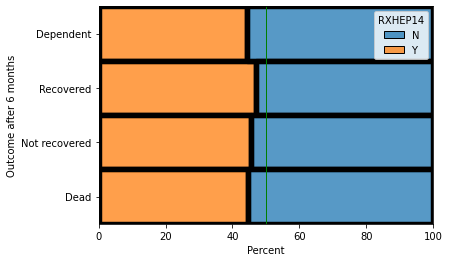

In [112]:
ax = sns.histplot(y = df.OCCODE,
                 hue= df.RXHEP14,
                 stat = 'probability',
                 multiple="fill",
                 #order = ['Control', 'Aspirin', 'Low Heparin', 'Medium Heparin', 'Aspirin + Low Heparin', 'Aspirin + Medium Heparin']
                 #palette = COLOR_STYPE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Outcome after 6 months")

plt.axvspan(0.499, 0.501, color = 'green')

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
#           labels = ['Indeterminate stroke', 'Haemorrhagic stroke', 'Ischaemic stroke'], labelspacing=1.2)

#plt.savefig("images/treat_perc_diagstr.png", bbox_inches="tight")
plt.show()

After 6 months: difference between heparin and no heparin

#### non vs low vs medium heparin


In [81]:
group_hep_l = df[df['HEP14']=='L'] # patients were given heparin for at least 14 days
group_hep_m = df[df['HEP14']=='M'] # patients were given heparin for at least 14 days
group_hep_n = df[df['RXHEP14']=='N'] # patients did not receive aspirin

In [82]:
data1 = group_hep_l['RDISCH14'].tolist()
data2 = group_hep_m['RDISCH14'].tolist()
data3 = group_hep_n['RDISCH14'].tolist()
stat, p = kruskal(data1, data2, data3)
print_stats(stat, p)

stat = 0.397, p = 0.820
Probably the same distribution


After 14 days: No difference between low, medium and no heparin.

In [113]:
data1 = group_hep_l['OCCODE'].tolist()
data2 = group_hep_m['OCCODE'].tolist()
data3 = group_hep_n['OCCODE'].tolist()
stat, p = kruskal(data1, data2, data3)
print_stats(stat, p)

stat = 5.865, p = 0.053
Probably the same distribution


After 6 months: No difference between different heparin treatments. 
Though, with Mann-Whitney-Test between single groups: slight difference between 'no heparin' and 'low heparin# (p = 0.046)

In [114]:
datax = [data1, data2, data3]
datay = [data1, data2, data3]

In [115]:
iterator = product(enumerate(datax), enumerate(datay))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 9383112.000, p = 0.500
Probably the same distribution

0 1
stat = 8918638.500, p = 0.333
Probably the same distribution

0 2
stat = 21977641.500, p = 0.046
Probably different distributions

1 0
stat = 8918638.500, p = 0.333
Probably the same distribution

1 1
stat = 8565660.500, p = 0.500
Probably the same distribution

1 2
stat = 20888907.500, p = 0.015
Probably different distributions

2 0
stat = 21977641.500, p = 0.046
Probably different distributions

2 1
stat = 20888907.500, p = 0.015
Probably different distributions

2 2
stat = 53240880.500, p = 0.500
Probably the same distribution



#### heparin vs non-heparin subdivided in prior heparin

#### heparin vs non-heparin subdivided in hours between onset and randomisation (3, 6, 12, 24, 48)

In [63]:
df.TREAT14.unique()

array(['Aspirin', 'Low Heparin', 'Medium Heparin',
       'Aspirin + Medium Heparin', 'Control', 'Aspirin + Low Heparin'],
      dtype=object)

### combination of aspirin and heparin
(significantly) different outcome than separate effects of aspirin and heparin

In [83]:
group_treat_a = df[df['TREAT14']=='Aspirin'] # patients were given heparin for at least 14 days
group_treat_c = df[df['TREAT14']=='Control'] # patients were given heparin for at least 14 days
group_treat_lh = df[df['TREAT14']=='Low Heparin'] # patients were given heparin for at least 14 days
group_treat_mh = df[df['TREAT14']=='Medium Heparin'] # patients were given heparin for at least 14 days
group_treat_alh = df[df['TREAT14']=='Aspirin + Low Heparin'] # patients were given heparin for at least 14 days
group_treat_amh = df[df['TREAT14']=='Aspirin + Medium Heparin'] # patients were given heparin for at least 14 days

In [84]:
data1 = group_treat_a['RDISCH14'].tolist()
data2 = group_treat_c['RDISCH14'].tolist()
data3 = group_treat_lh['RDISCH14'].tolist()
data4 = group_treat_mh['RDISCH14'].tolist()
data5 = group_treat_alh['RDISCH14'].tolist()
data6 = group_treat_amh['RDISCH14'].tolist()
stat, p = kruskal(data1, data2, data3, data4, data5, data6)
print_stats(stat, p)

stat = 6.635, p = 0.249
Probably the same distribution


In [85]:
data0 = group_treat_a['OCCODE'].tolist()
data1 = group_treat_c['OCCODE'].tolist()
data2 = group_treat_lh['OCCODE'].tolist()
data3 = group_treat_mh['OCCODE'].tolist()
data4 = group_treat_alh['OCCODE'].tolist()
data5 = group_treat_amh['OCCODE'].tolist()
stat, p = kruskal(data0, data1, data2, data3, data4, data5)
print_stats(stat, p)

stat = 42.945, p = 0.000
Probably different distributions


In [87]:
datax = [data0, data1, data2, data3, data4, data5]
datay = [data0, data1, data2, data3, data4, data5]

In [88]:
iterator = product(enumerate(datax), enumerate(datay))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 11007432.000, p = 0.500
Probably the same distribution

0 1
stat = 12418896.500, p = 0.000
Probably different distributions

0 2
stat = 4994206.500, p = 0.011
Probably different distributions

0 3
stat = 4893458.000, p = 0.039
Probably different distributions

0 4
stat = 4991736.500, p = 0.445
Probably the same distribution

0 5
stat = 4660267.500, p = 0.335
Probably the same distribution

1 0
stat = 12418896.500, p = 0.000
Probably different distributions

1 1
stat = 15831564.500, p = 0.500
Probably the same distribution

1 2
stat = 6026950.500, p = 0.028
Probably different distributions

1 3
stat = 5820116.000, p = 0.008
Probably different distributions

1 4
stat = 5630761.000, p = 0.000
Probably different distributions

1 5
stat = 5261102.000, p = 0.000
Probably different distributions

2 0
stat = 4994206.500, p = 0.011
Probably different distributions

2 1
stat = 6026950.500, p = 0.028
Probably different distributions

2 2
stat = 2420000.000, p = 0.500
Probably the same 

+ 0 1: p = 0.000
+ 0 2: p = 0.011
+ 1 2: p = 0.028
+ 1 3: p = 0.008
+ 1 4: p = 0.000
+ 1 5: p = 0.000
+ 2 4: p = 0.020
+ 2 5: p = 0.013


In [ ]:
# randomization aspect

In [ ]:
# hep or asp prior to stroke - aspect